# Import all the necessary modules


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,f1_score
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Data Understanding

In [2]:
#load the dataset
df=pd.read_csv("smoke_detection_iot.csv")

In [3]:
#see the head of dataset
df.head(15)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.0,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.0,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.0,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.0,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.0,0.000,0.000,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.00,0.00,0.0,0.000,0.000,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.00,0.00,0.0,0.000,0.000,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.00,0.00,0.0,0.000,0.000,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.00,0.00,0.0,0.000,0.000,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.90,3.78,0.0,4.369,2.780,9,0


In [4]:
# Now let's understand all the columns as per their name and order
df.columns


Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [5]:
#shape of the dataset
df.shape

(62630, 16)

In [6]:
#drop the unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
#mathematical property of the columns
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [8]:
#check null values
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [9]:
#check any duplicated values
df.duplicated().sum()

0

In [10]:
#info of about datatype and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [11]:
#see all the unique values in each column
def uniquecounts(df):
    for x in df.columns:
        print(x , len(df[x].unique()), df[x].unique())
uniquecounts(df)

UTC 62630 [1654733331 1654733332 1654733333 ... 1655130049 1655130050 1655130051]
Temperature[C] 21672 [20.    20.015 20.029 ... 15.714 16.333 16.957]
Humidity[%] 3890 [57.36 56.67 55.96 ... 16.59 15.99 15.84]
TVOC[ppb] 1966 [  0  30  36 ... 513 517 643]
eCO2[ppm] 1713 [ 400  403  406 ... 1365 1013  948]
Raw H2 1830 [12306 12345 12374 ... 13727 13718 13731]
Raw Ethanol 2659 [18520 18651 18764 ... 20413 20468 20482]
Pressure[hPa] 2213 [939.735 939.744 939.738 ... 936.635 936.642 936.659]
PM1.0 1337 [0.   0.9  0.89 ... 4.98 4.57 3.62]
PM2.5 1351 [0.   3.78 3.71 ... 5.17 4.04 3.76]
NC0.5 3093 [ 0.    0.14  0.13 ... 26.73 24.89 19.27]
NC1.0 4113 [0.    4.369 4.289 ... 3.881 0.641 0.731]
NC2.5 1161 [0.    2.78  2.73  ... 0.202 0.16  0.121]
CNT 24994 [    0     1     2 ... 24991 24992 24993]
Fire Alarm 2 [0 1]


In [12]:
#ending of dataset
df.tail()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [13]:
#correlation
df.corr()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature[C],-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.105304,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916


# Data visualization

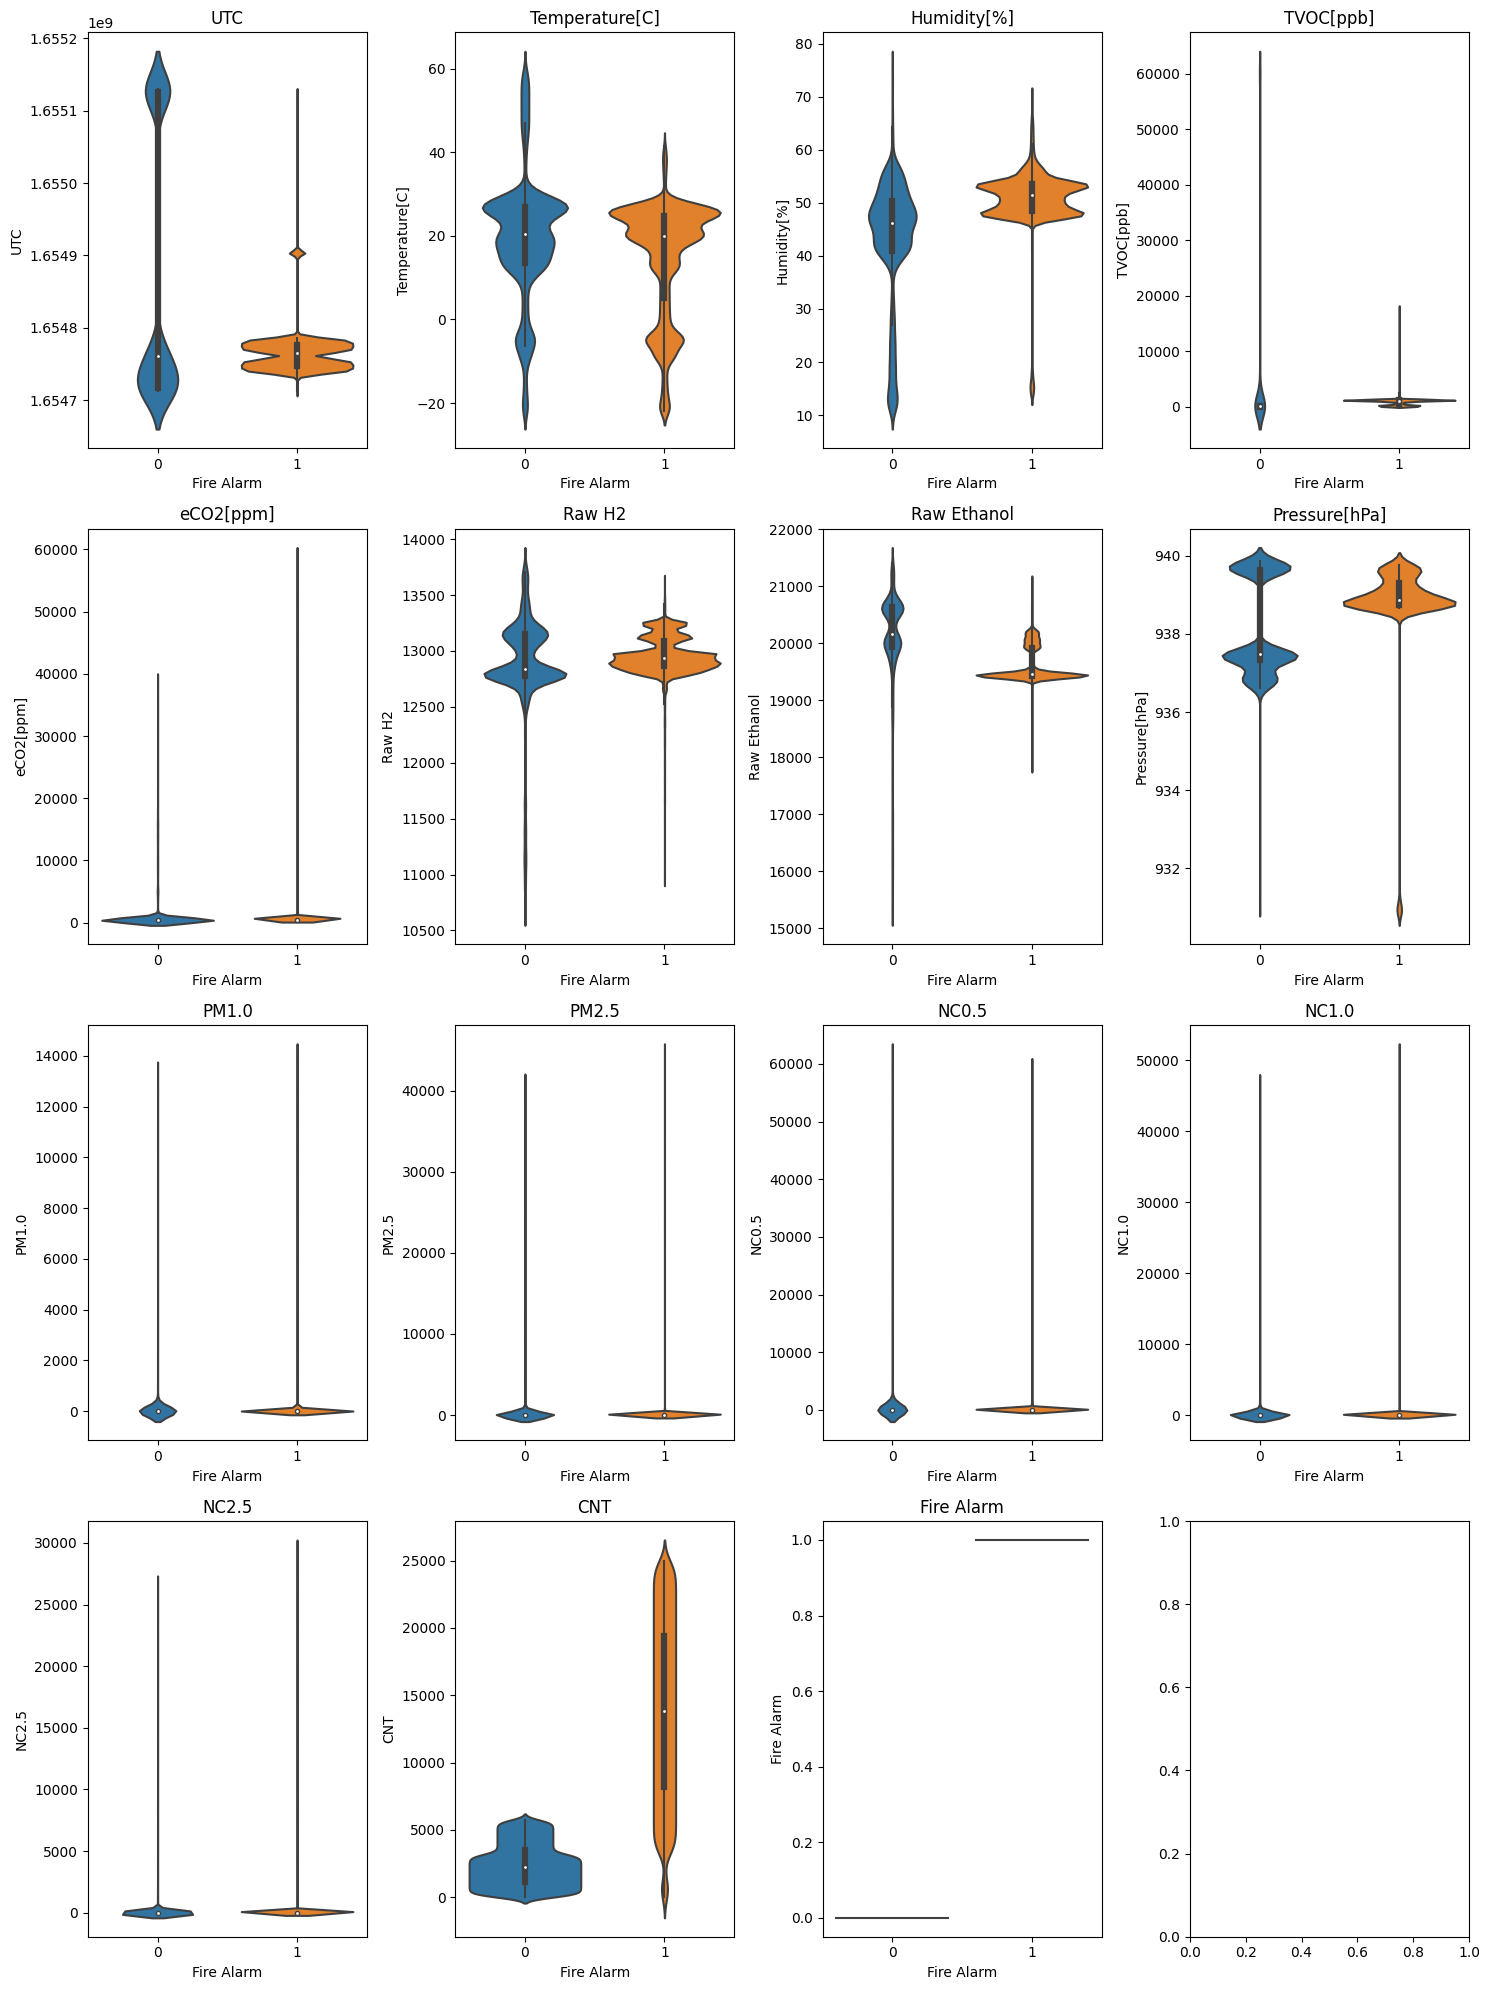

In [15]:
def violinplot(df, columns_per_row=4):
    num_columns = df.shape[1]
    num_rows = (num_columns + columns_per_row - 1) // columns_per_row

    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))

    for i, col in enumerate(df.columns):
        row_index = i // columns_per_row
        col_index = i % columns_per_row

        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

        sns.violinplot(x='Fire Alarm', y=col, data=df, ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()
violinplot(df)

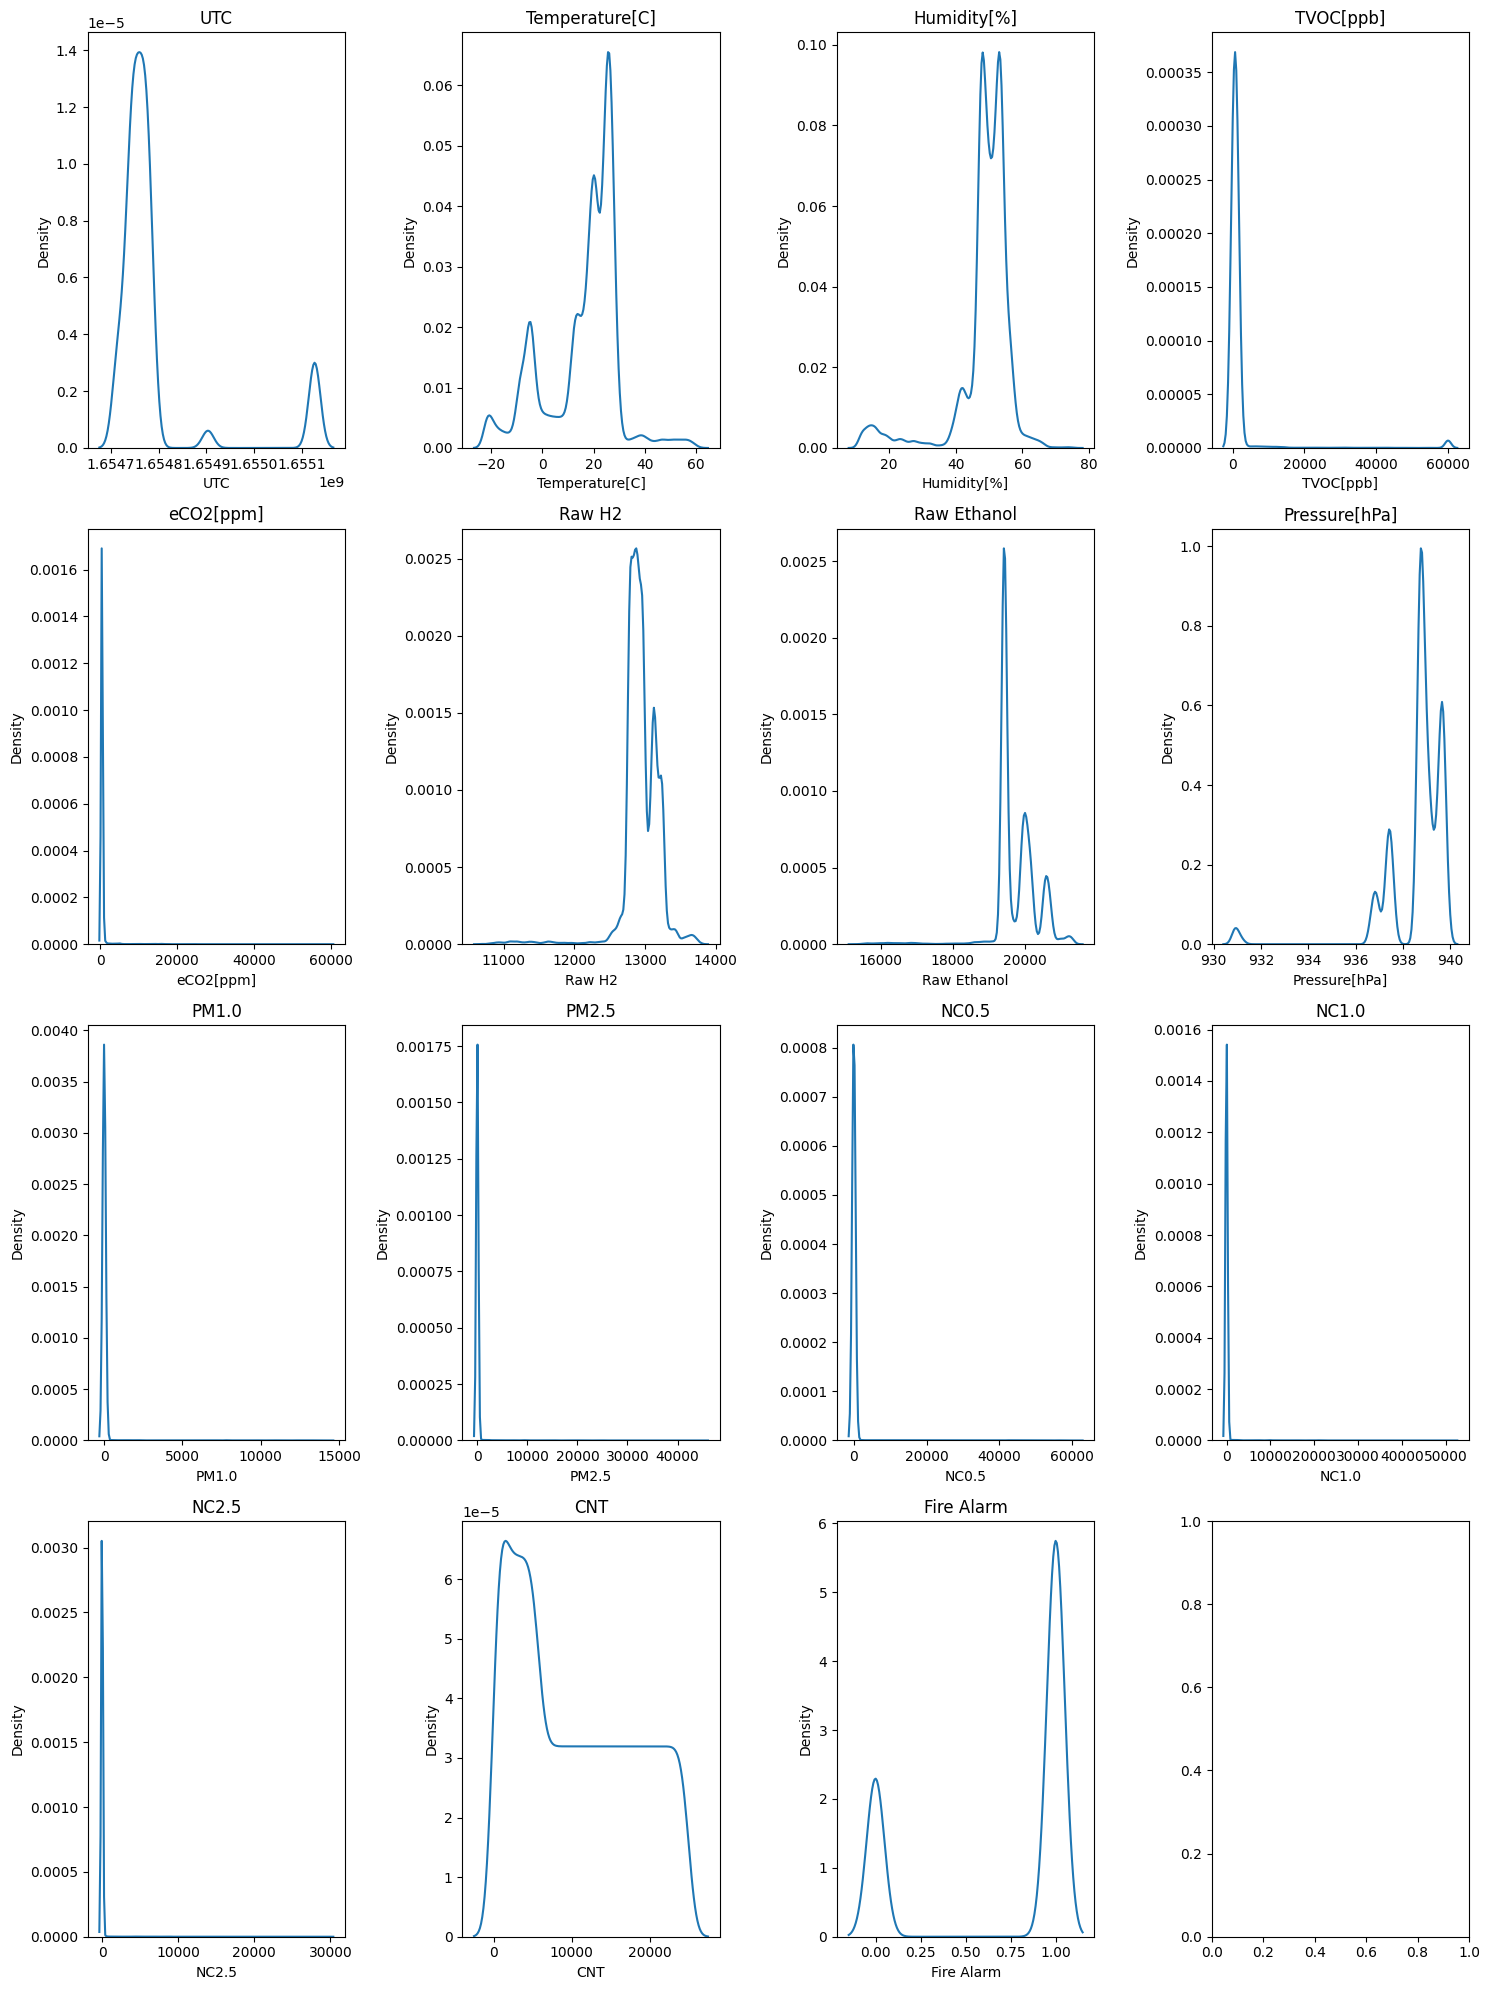

In [17]:
def kdeplot(df, columns_per_row=4):
    num_columns = df.shape[1]
    num_rows = (num_columns + columns_per_row - 1) // columns_per_row

    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))

    for i, col in enumerate(df.columns):
        row_index = i // columns_per_row
        col_index = i % columns_per_row

        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]

        sns.kdeplot(x=df[col], ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()
kdeplot(df)

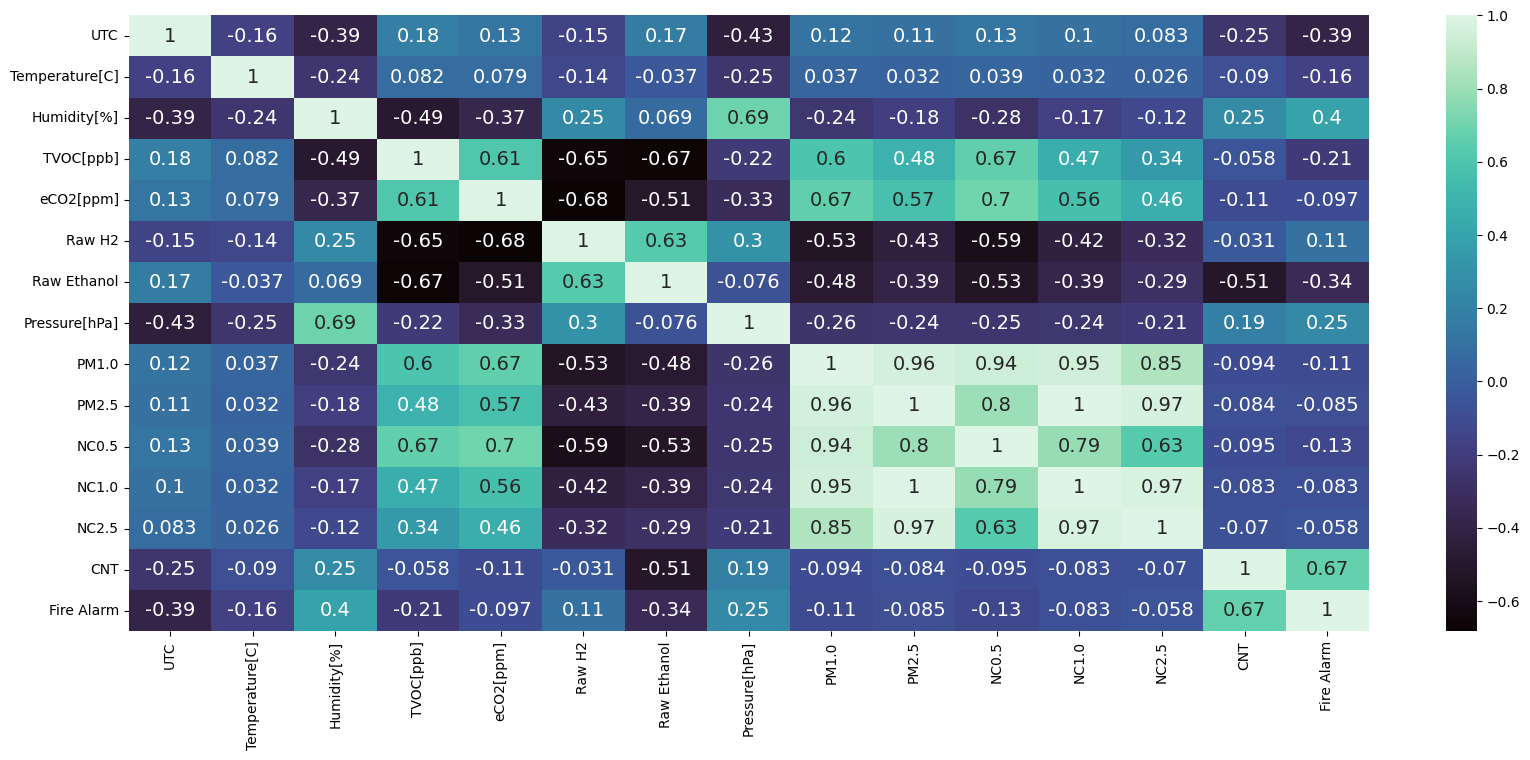

In [16]:
#heatmap of the entire dataset
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='mako',annot_kws={"size":14})
plt.show()

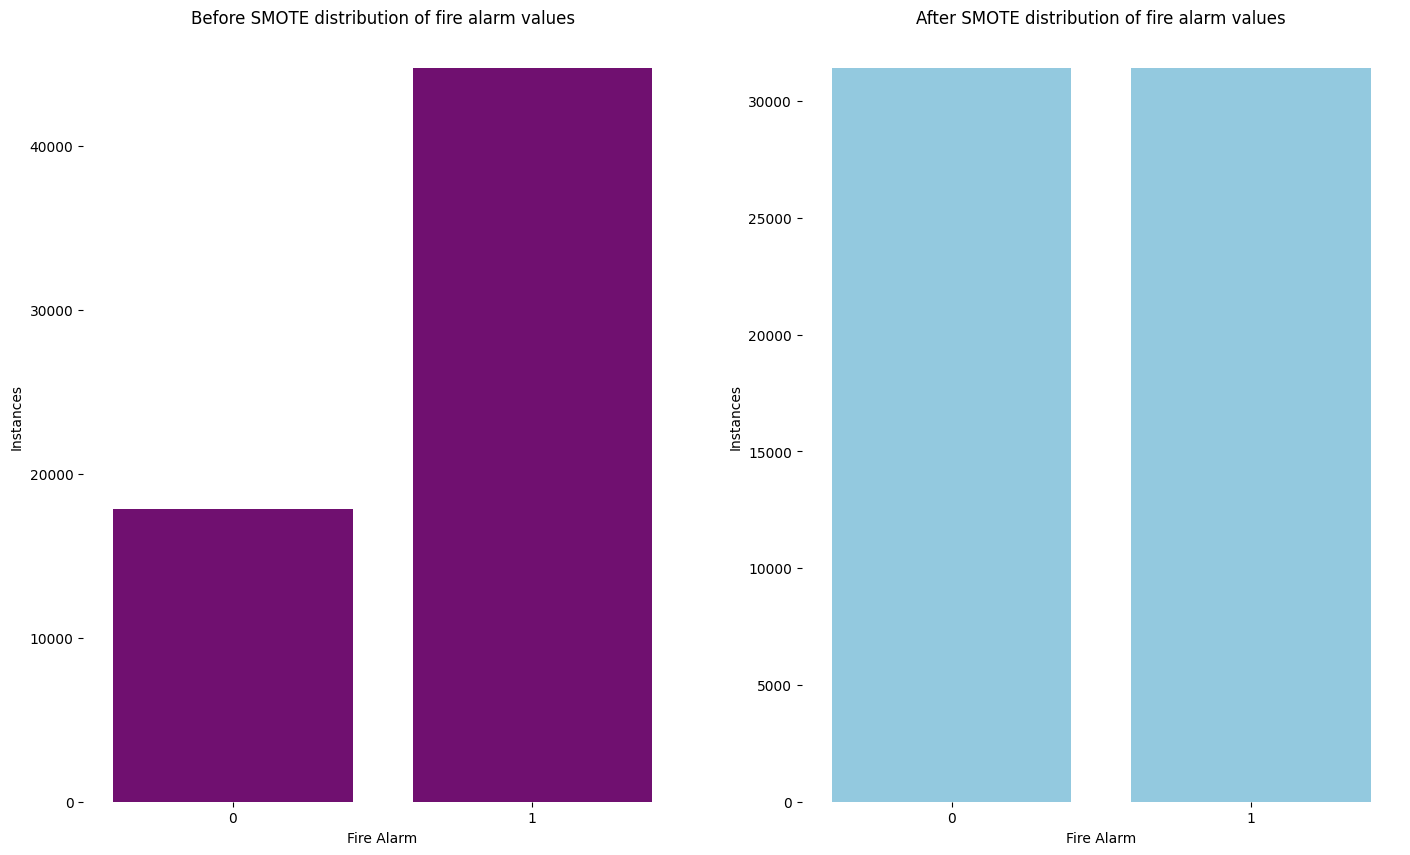

In [72]:
fig,axes = plt.subplots(1,2,figsize=(17,10))

sns.countplot(x='Fire Alarm', data=df , ax=axes[0],hue_order="Fire Alarm",color="purple")
axes[0].set_title("Before SMOTE distribution of fire alarm values")
axes[0].set_xlabel("Fire Alarm")
axes[0].set_ylabel("Instances")
sns.despine(bottom=True, left =True,ax=axes[0])

sns.countplot(x='Fire Alarm',data=pd.DataFrame({'Fire Alarm' : y_train_res}),ax=axes[1],hue_order="Fire Alarm",color="skyblue")
axes[1].set_title("After SMOTE distribution of fire alarm values")
axes[1].set_xlabel("Fire Alarm")
axes[1].set_ylabel("Instances")
sns.despine(bottom=True,left=True,ax=axes[1])


# Train Test Split

In [20]:
#train test split
x=df.drop(columns=['Fire Alarm'])
y=df['Fire Alarm']
x.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in x.columns]
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

# 1 -> Accuracy as Simple and Scaling

In [21]:
algos=[RandomForestClassifier(),xgb.XGBClassifier(),LGBMClassifier(),DecisionTreeClassifier(max_depth=5)]

In [22]:
def model(y):
    x=y
    x.fit(X_train,y_train)
    y_pred=x.predict(X_test)
    print(" ")
    print(" ")
    print(y)
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("F1 score : ",f1_score(y_test,y_pred))
    print("AUC score : ",roc_auc_score(y_test,y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31403, number of negative: 12438
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 43841, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.716293 -> initscore=0.926147
[LightGBM] [Info] Start training from score 0.926147


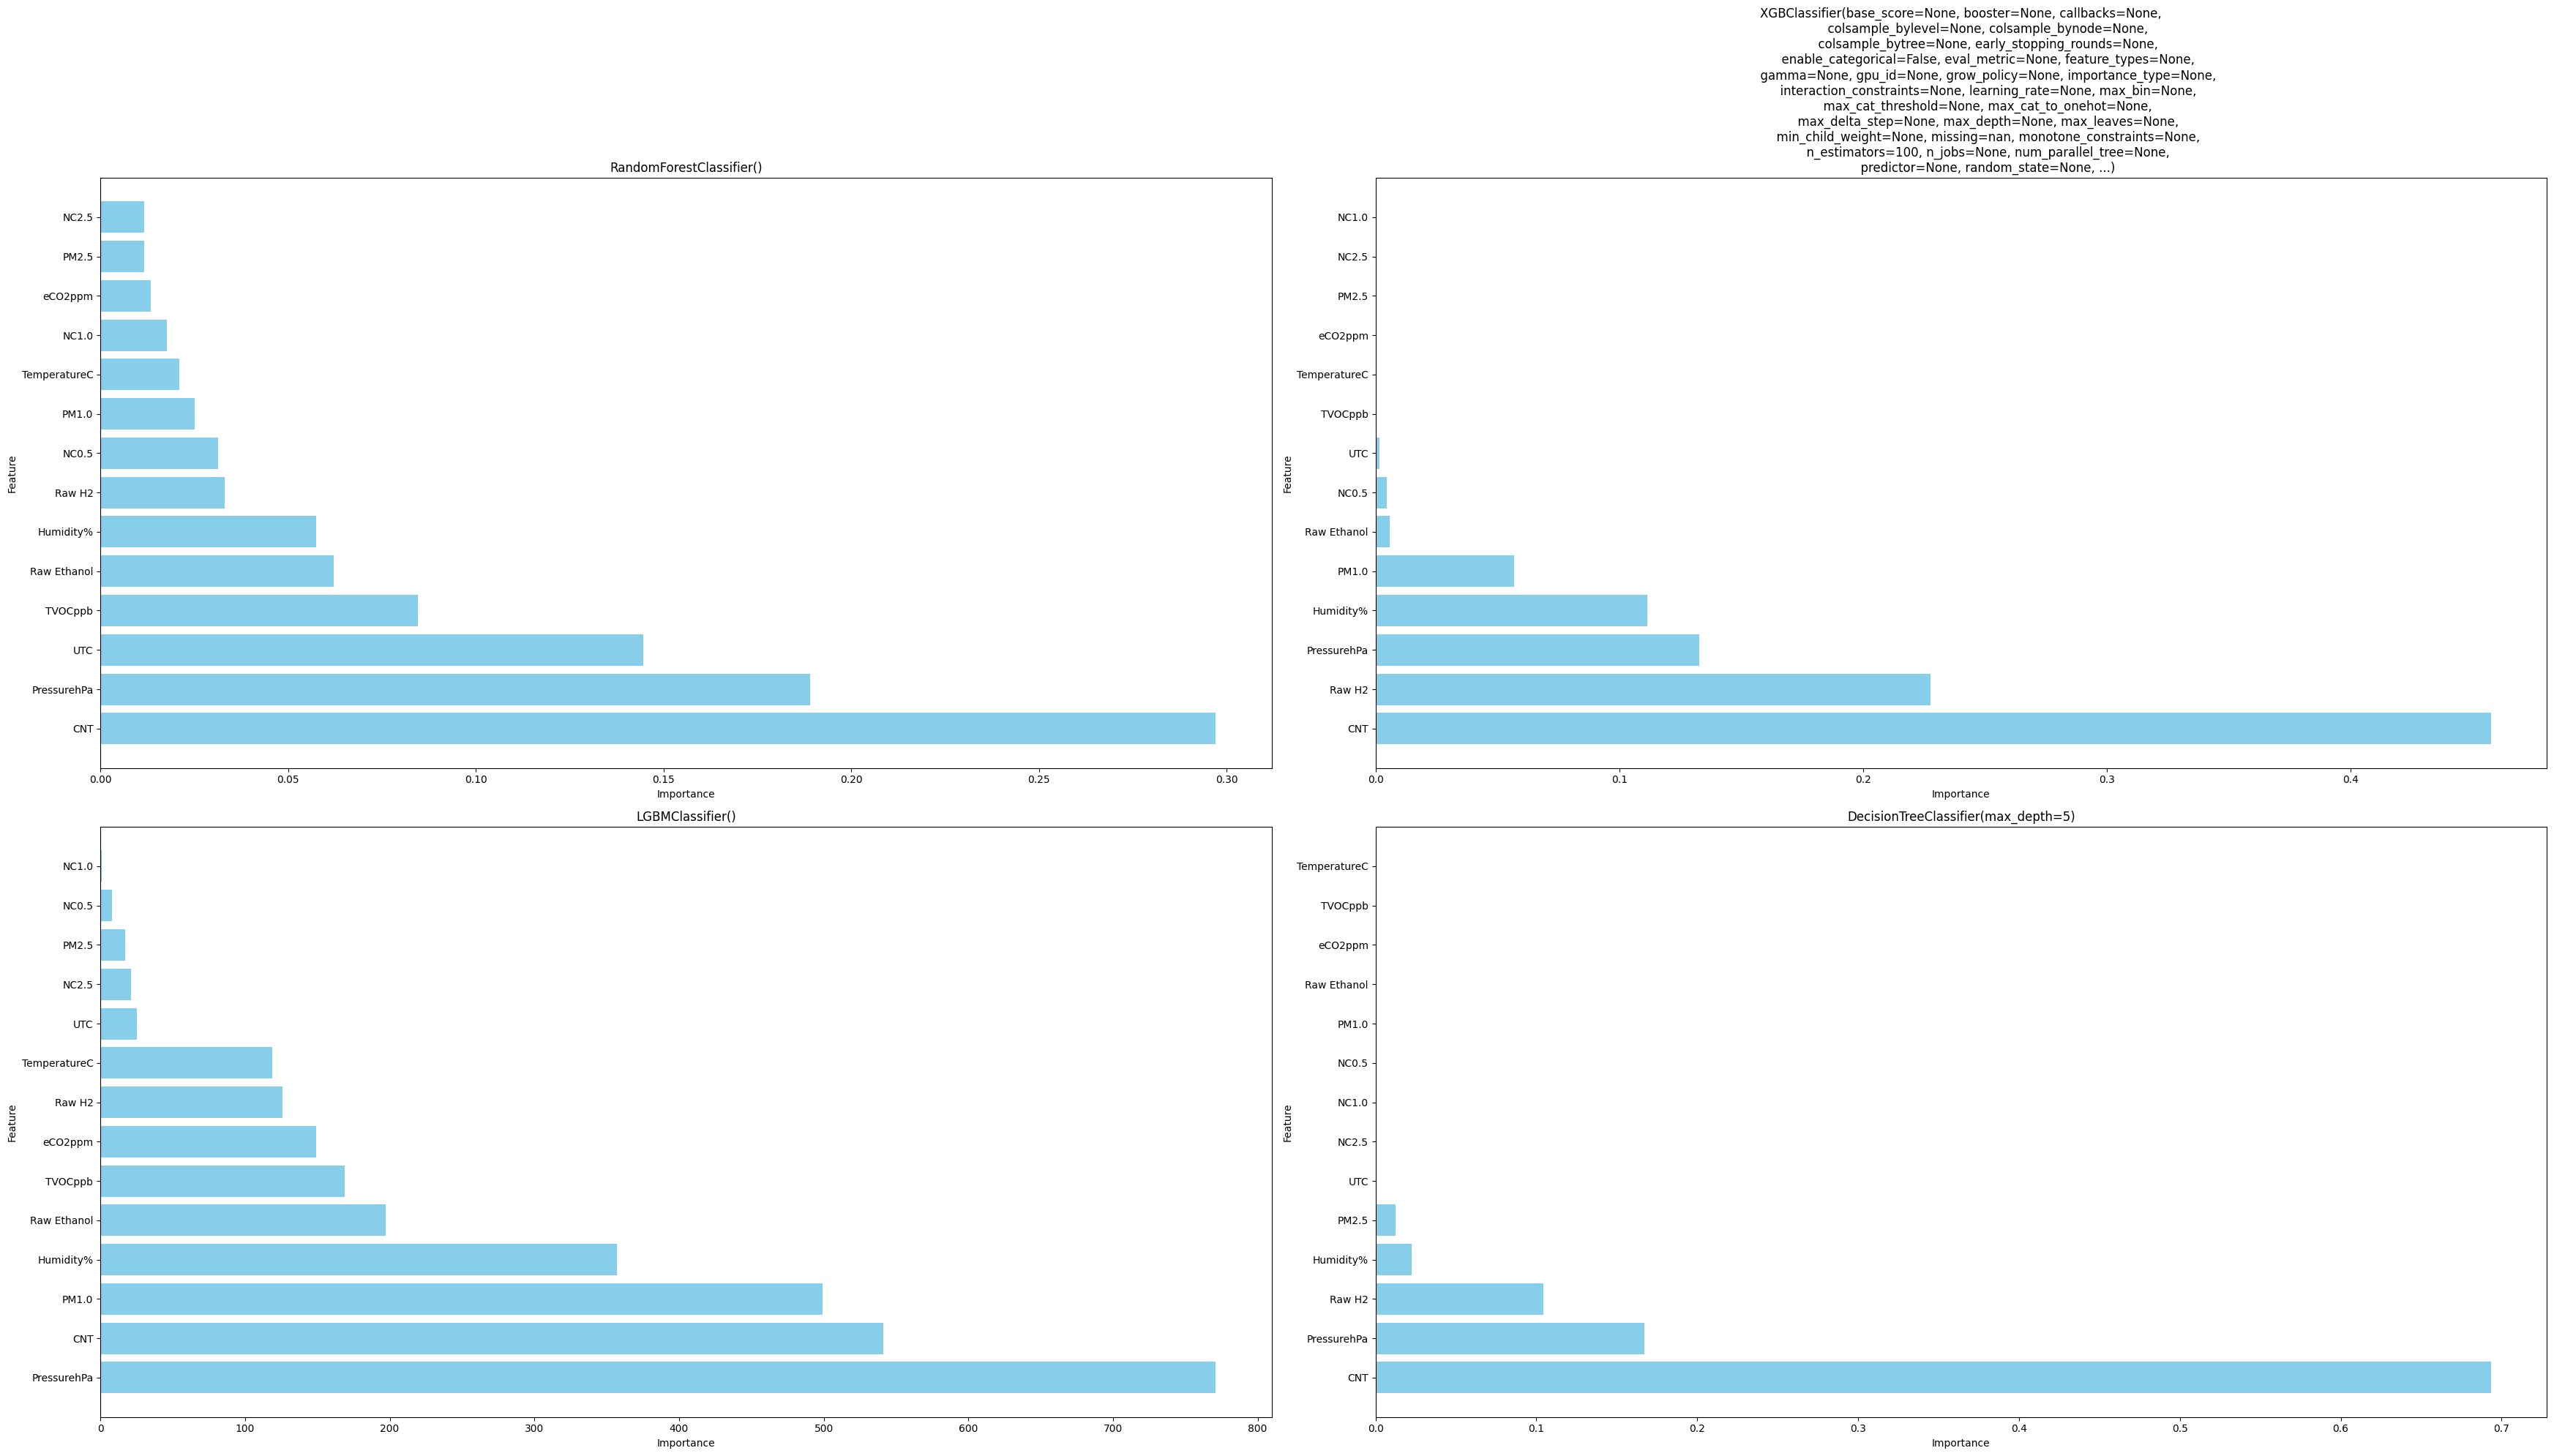

In [69]:
def feature(y, ax):
    clf = y
    clf.fit(X_train, y_train)

    # Get feature importances from the trained model
    importances = clf.feature_importances_

    # Get the column names
    feature_names = X_train.columns

    # Get the indices of features sorted by importance
    indices = importances.argsort()[::-1]

    # Plotting the feature importances on the provided axis
    ax.barh(range(X_train.shape[1]), importances[indices], color='skyblue', align="center")
    ax.set_title("Feature Importances :" )
    ax.set_title(y)
    ax.set_yticks(range(X_train.shape[1]))
    ax.set_yticklabels(feature_names[indices])
    ax.set_ylim([-1, X_train.shape[1]])
    ax.set_xlabel("Importance")
    ax.set_ylabel("Feature")

# Assuming you have a list of classifiers 'algos'
num_plots = len(algos)
num_rows = 2
num_columns = (num_plots + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_columns, figsize=(35,20))

for i, x in enumerate(algos):
    row_index = i // num_columns
    col_index = i % num_columns
    feature(x, axes[row_index, col_index])

plt.tight_layout()
plt.show()


In [24]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [25]:
#for accuracy , precision , mea , f1 score, confusion matrix
for x in algos:
    model(x)

 
 
RandomForestClassifier()
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

F1 score :  0.9999625594368939
AUC score :  0.9999080036798529
 
 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
   

[Text(0.5909090909090909, 0.875, 'x[13] <= 5742.5\ngini = 0.406\nsamples = 43841\nvalue = [12438, 31403]'),
 Text(0.36363636363636365, 0.625, 'x[5] <= 13206.5\ngini = 0.385\nsamples = 16816\nvalue = [12437, 4379]'),
 Text(0.18181818181818182, 0.375, 'x[7] <= 933.979\ngini = 0.212\nsamples = 12137\nvalue = [10673, 1464]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.037\nsamples = 699\nvalue = [13, 686]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.127\nsamples = 11438\nvalue = [10660, 778]'),
 Text(0.5454545454545454, 0.375, 'x[7] <= 939.618\ngini = 0.47\nsamples = 4679\nvalue = [1764, 2915]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.166\nsamples = 1821\nvalue = [1655, 166]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.073\nsamples = 2858\nvalue = [109, 2749]'),
 Text(0.8181818181818182, 0.625, 'x[0] <= 1654958208.0\ngini = 0.0\nsamples = 27025\nvalue = [1, 27024]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 27024\nvalue = [0, 27024]'),
 Text(0.9090909090909091, 0.375

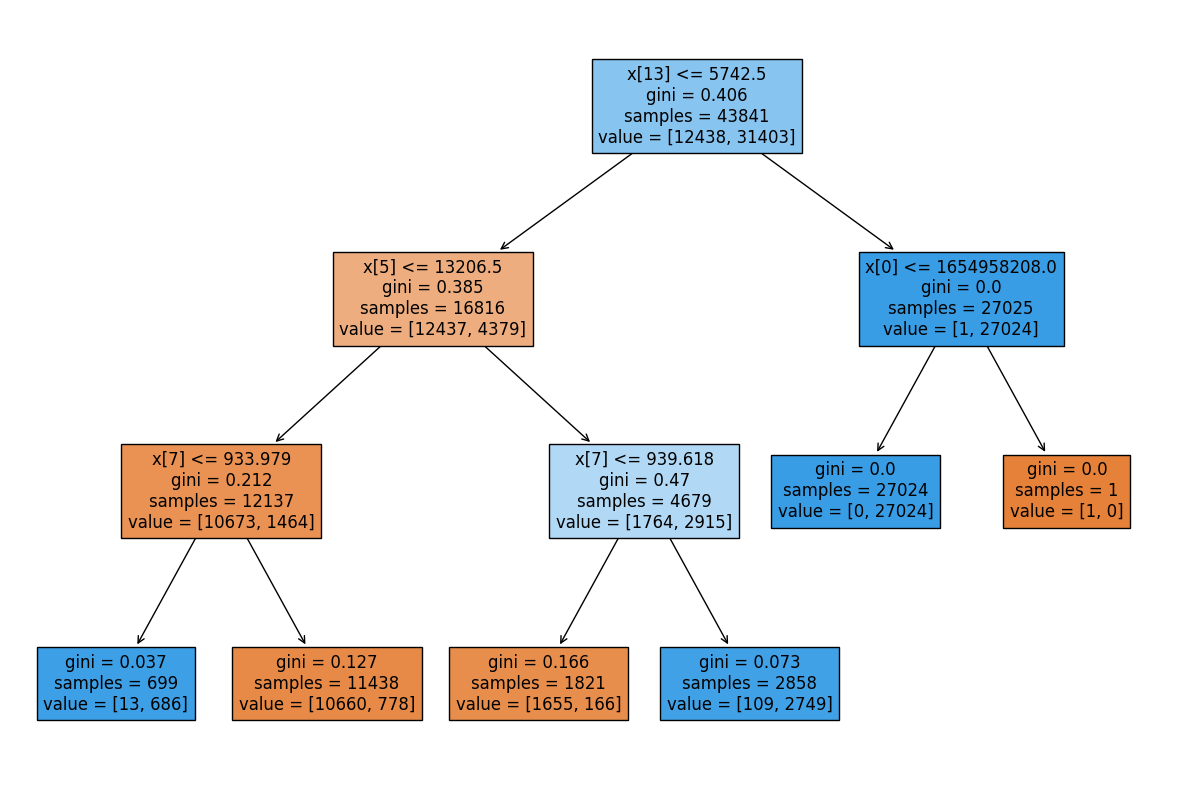

In [26]:
#DecisionTree for accuracy , precision , mea , f1 score, confusion matrix
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [27]:
#scaling of the splitted data
preprocessing=StandardScaler()
preprocessing.fit(X_train,X_test)
X_train_scaled=preprocessing.transform(X_train)
X_test_scaled=preprocessing.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [30]:
def model_scaled(y):
    x=y
    x.fit(X_train_scaled,y_train)
    y_pred=x.predict(X_test_scaled)
    print("Classification Report",classification_report(y_test,y_pred))
    print("F1 score",f1_score(y_test,y_pred))
    print("AUC score",roc_auc_score(y_test,y_pred))

In [28]:
#randomforest for accuracy , precision , mea , f1 score, confusion matrix
# for x in algos:
#     model_scaled(x)

# 2 -> Accuracy after applying SMOTE

In [29]:
#applying smote algorithm
sm = SMOTE(random_state = 96)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [33]:
def model_smote(y):
    x=y
    x.fit(X_train_res,y_train_res)
    y_pred=x.predict(X_test_scaled)
    print(y)
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("F1 score : ",f1_score(y_test,y_pred))
    print("AUC score : ",roc_auc_score(y_test,y_pred))

In [34]:
#randomforest for accuracy , precision , mea , f1 score, confusion matrix
for x in algos:
    model_smote(x)

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

F1 score 1.0
AUC score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

F1 score 0.9999625594368939
AUC score 0.9999080036798529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31403, number of negative: 31403
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the ov

# 3 -> Accuracy after applying hyperparameter tuning

In [ ]:
#hyperparameter tuning
param_grid = { 
   'n_estimators': [20,60,100,120],
   'max_features': [0.2,0.6,1.0],
   'max_depth' : [2,8,None],
   'max_samples' : [0.5,0.75,1.0],
   'bootstrap': [True,False],
   'min_samples_split': [2,5],
   'min_samples_leaf': [1,2]
} 

# Create an instance of RandomForestClassifier as the estimator
rfc = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid, cv=5, verbose=2, n_jobs=-1)
rfc.fit(X_train_res, y_train_res)
best_params = rfc.best_params_

lr=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= , max_depth=8, criterion='gini')
# lr.fit(X_train_res, y_train_res)
# y_pred=lr.predict(X_test)

# print('r2 score : ', r2_score(y_test,y_pred))
# print('MEA : ', mean_absolute_error(y_test,y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\rupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or se

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 1.0,
 'max_features': 0.6,
 'max_depth': 8,
 'bootstrap': True}

In [ ]:
# rfc.best_score_

0.9998567005748772


# 4 -> Accuracy after applying feature selection

In [35]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 6]
X_clf_new=SelectKBest(score_func=f_regression,k=6).fit_transform(X_train_res,y_train_res)

In [36]:
X_clf_new[:5].view()

array([[ 1.02583577, -2.05446508, -0.16587784, -0.66625714, -5.6801501 ,
        -1.35329877],
       [-0.72552556, -0.63665733, -0.24046718,  1.60373564, -0.80637609,
        -1.3793348 ],
       [-0.06407987,  0.21854622, -0.08134327, -0.5710586 ,  0.05746405,
         1.64321141],
       [-0.22471485,  0.35637295, -0.24798986,  0.83558191,  0.84455184,
        -0.66058262],
       [-0.35675276,  0.59813459, -0.09460359, -0.53330745,  0.06649374,
         1.12919709]])

In [37]:
X_train_res.head()

,UTC,TemperatureC,Humidity%,TVOCppb,eCO2ppm,Raw H2,Raw Ethanol,PressurehPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1.025836,1.082289,-2.054465,-0.165878,0.260791,0.525937,-0.666257,-5.680150,0.327053,0.116373,0.539725,0.101274,-0.065270,-1.353299
1,-0.725526,0.801921,-0.636657,-0.240467,-0.113911,-0.309936,1.603736,-0.806376,-0.106962,-0.092393,-0.112125,-0.091076,-0.074317,-1.379335
2,-0.064080,0.723306,0.218546,-0.081343,-0.140675,0.122665,-0.571059,0.057464,-0.107545,-0.092673,-0.112995,-0.091333,-0.074329,1.643211
3,-0.224715,0.394239,0.356373,-0.247990,-0.140675,1.218832,0.835582,0.844552,-0.106756,-0.092293,-0.111811,-0.090983,-0.074312,-0.660583
4,-0.356753,0.332112,0.598135,-0.094604,-0.136043,-0.097302,-0.533307,0.066494,-0.107891,-0.092838,-0.113512,-0.091485,-0.074335,1.129197


In [38]:
# utc, temp, humidity, tvoc, raw ethanol, pressure, pm1.0, nc0.5, cnt
X_train_res.drop(columns=['UTC','eCO2[ppm]', 'Raw H2','PM1.0','PM2.5','NC0.5','NC1.0', 'NC2.5'],inplace=True)
X_test_scaled.drop(columns=['UTC','eCO2[ppm]', 'Raw H2','PM1.0','PM2.5','NC0.5','NC1.0', 'NC2.5'],inplace=True)


KeyError: "['eCO2[ppm]'] not found in axis"

In [ ]:
X_train_res.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa],CNT
0,1.082289,-2.054465,-0.165878,-0.666257,-5.680150,-1.353299
1,0.801921,-0.636657,-0.240467,1.603736,-0.806376,-1.379335
2,0.723306,0.218546,-0.081343,-0.571059,0.057464,1.643211
3,0.394239,0.356373,-0.247990,0.835582,0.844552,-0.660583
4,0.332112,0.598135,-0.094604,-0.533307,0.066494,1.129197


In [ ]:
X_test_scaled.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw Ethanol,Pressure[hPa],CNT
0,0.373368,0.382357,-0.231542,0.618923,0.797898,-0.581686
1,0.579991,0.591356,-0.083766,-0.571059,0.108632,1.776547
2,1.903915,-3.390932,-0.249137,2.578700,-1.367722,-0.760256
3,0.172309,0.931404,-0.203491,0.256184,0.500671,-0.229016
4,-1.413198,0.994669,-0.143947,-0.374096,0.382533,-0.113958


In [39]:
def model_select(y):
    x=y
    x.fit(X_train_res,y_train_res)
    y_pred=x.predict(X_test_scaled)
    print("Classification Report",classification_report(y_test,y_pred))
    print("F1 score",f1_score(y_test,y_pred))
    print("AUC score",roc_auc_score(y_test,y_pred))


In [47]:
for x in algos:
    model_select(x)

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

F1 score 1.0
AUC score 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       1.00      1.00      1.00     13354

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789

F1 score 0.9999625594368939
AUC score 0.9999080036798529
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31403, number of negative: 31403
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the ov

# Pipeline for all four steps

In [ ]:
# trf1=ColumnTransformer(
#     transformers=[
#         ('scale',StandardScaler())
#     ],
#     remainder='passthrough'
# )

In [ ]:
# trf2=ColumnTransformer(
#     transformers=[
#         ("smote",SMOTE)
#     ],
#     remainder='passthrough'
#     )

# 1) RandomForestClassifier

In [56]:
print(X_train.columns)

Index(['UTC', 'TemperatureC', 'Humidity%', 'TVOCppb', 'eCO2ppm', 'Raw H2',
       'Raw Ethanol', 'PressurehPa', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT'],
      dtype='object')


In [60]:
X_train.head()

,UTC,TemperatureC,Humidity%,TVOCppb,eCO2ppm,Raw H2,Raw Ethanol,PressurehPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
50246,1654903263,31.520,30.36,653,1180,13085,19345,931.081,403.82,419.80,2778.68,433.695,10.028,258
51202,1654712247,27.490,42.91,68,452,12857,20728,937.558,2.33,2.42,16.02,2.497,0.056,60
48040,1654784389,26.360,50.48,1316,400,12975,19403,938.706,1.79,1.86,12.33,1.923,0.043,23046
30520,1654766869,21.630,51.70,9,400,13274,20260,939.752,2.52,2.62,17.35,2.706,0.061,5526
19137,1654752468,20.737,53.84,1212,409,12915,19426,938.718,1.47,1.53,10.14,1.582,0.036,19137


50246    1
51202    0
48040    1
30520    1
19137    1
Name: Fire Alarm, dtype: int64

In [63]:
features=['UTC', 'TemperatureC', 'Humidity%', 'TVOCppb', 'eCO2ppm', 'Raw H2',
       'Raw Ethanol', 'PressurehPa', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT']

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Define your feature columns (list of column names)
features=['UTC', 'TemperatureC', 'Humidity%', 'TVOCppb', 'eCO2ppm', 'Raw H2',
       'Raw Ethanol', 'PressurehPa', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT']

# Create a ColumnTransformer for scaling and feature selection
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features),
        ('feature_selection', SelectKBest(score_func=f_regression, k=6), features)
    ],
    remainder='passthrough'
)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [20, 60, 100],
    'max_features': [0.2, 0.6, 1.0],
    'max_depth': [2, 8, None],
    'max_samples': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create a RandomizedSearchCV instance with the estimator as RandomForestClassifier
rfc = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a pipeline that includes column transformation and RandomForestClassifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rfc)
])

# Fit the pipeline to your resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions using the fitted pipeline
y_pred = pipeline.predict(X_test)  # Assuming you have defined X_test


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\rupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rupap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or se

# 2) XGboost

In [70]:
# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 2],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}

# Create a custom transformer for SMOTE
class SMOTETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, random_state=96):
        self.random_state = random_state
        self.sm = SMOTE(random_state=self.random_state)

    def fit(self, X, y):
        return self

    def transform(self, X, y=None):
        X_resampled, y_resampled = self.sm.fit_resample(X, y)
        return X_resampled, y_resampled


# Create a ColumnTransformer for scaling and SMOTE
# Create a ColumnTransformer for scaling, SMOTE, and feature selection
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features),
        ('smote', SMOTETransformer(), features),
        ('featureS', SelectKBest(score_func=f_regression, k=6), features)  # Add an empty string as the name
    ],
    remainder='passthrough'
)


xgb_classifier = xgb.XGBClassifier(booster='gbtree', random_state=42)

# Create the RandomizedSearchCV instance with the estimator as XGBoost
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=2, random_state=42)

# Create a pipeline that includes column transformation and XGBoost classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_search)
])

# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Make predictions using the fitted pipeline
y_pred = pipeline.predict(X_test)

# Access the best hyperparameters found by RandomizedSearchCV
best_params = pipeline.named_steps['classifier'].best_params_


NameError: name 'features' is not defined

# 3) LGBMClassifier